# Aloscene: Computer vision with ease

Aloscene extends the use of tensors with Augmented Tensors and Spatial Augmented Tensors. The latter are designed to facilitate the use of computer vision data (such as frames, 2d boxes, 3d boxes, optical flow, disparity, camera parametersâ€¦).

## Hello world

In the following, we simply use the CocoDetectionDataset to display one frame. 

- The `get_view` method is specific to **Augmented Tensor**. It makes it easy for someone to display all the avaiable data within a **Frame**
- `get_view` return a `View` object that can be used to `render()` the frame using matplotlib or opencv.
- By default, all labels within a frame will get their own view.

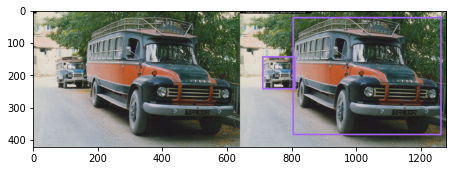

In [10]:
from alodataset import CocoDetectionDataset

coco_dataset = CocoDetectionDataset(sample=True)
frame = coco_dataset.getitem(0)
frame.get_view().render()


<div class="alert alert-info">
**NOTE**
    
We're using the `sample`, therefore, you don't need to have the CocoDataset installed on your machine. A small sample will be automatically downloaded for you.
</div>


## Exploring Frames

Compared to simple Tensor, a Frame is a Tensor with additional properties. For instance, a Frame is a Tensor with a defined normalization (between 0 and 255 in the following example) and attached boxes of shape (2, 4)


In [13]:
frame

tensor(
	normalization=255, 
	boxes2d=torch.Size([2, 4])
	[[[153., 154., 152.,  ..., 207., 200., 127.],
         [179., 182., 186.,  ..., 238., 160., 124.],
         [236., 239., 240.,  ..., 246., 235., 240.],
         ...,
         [188., 185., 187.,  ..., 114., 119.,  84.],
         [187., 184., 186.,  ..., 147., 148., 133.],
         [192., 189., 192.,  ..., 126., 135., 138.]],

        [[142., 141., 139.,  ..., 214., 181.,  99.],
         [192., 195., 198.,  ..., 220., 152., 155.],
         [224., 227., 229.,  ..., 221., 240., 241.],
         ...,
         [193., 192., 194.,  ..., 126., 125., 110.],
         [191., 189., 195.,  ..., 163., 166., 164.],
         [197., 194., 197.,  ..., 141., 143., 153.]],

        [[124., 124., 120.,  ..., 198., 151.,   0.],
         [209., 212., 214.,  ..., 208., 163., 176.],
         [208., 211., 211.,  ..., 167., 243., 236.],
         ...,
         [196., 202., 204.,  ..., 124., 125., 107.],
         [203., 192., 192.,  ..., 176., 170., 167.],
  

### Normalizing your frame

It is common in computer vision to require your frame to match a specific shape. Therefore, you can at any stage of your data pipeline make sure that the frame is in the right format.

In the following code `frame_01`will be converted with values between 0 and 1 based on the current frame normalization.

In [16]:
frame_01 = frame.norm01()
assert frame_01.normalization == "01"

Here is a quick overview of the other types of normalization available.

In [40]:
# Between 0 and 255
frame_255 = frame.norm255()
assert frame_255.normalization == "255"

 # Great for resnet backbones
frame_resnet = frame.norm_resnet()
assert frame_resnet.normalization == "resnet"

# A custom mean/std norm
my_frame = frame.mean_std_norm(
    (0.42, 0.4, 0.40), (0.41, 0.2, 0.45), 
    name="my_norm"
)
assert my_frame.normalization == "my_norm"

# Between 0 and 1
frame_01 = my_frame.norm01()
assert frame_01.normalization == "01"


<div class="alert alert-info">
**NOTE**
    
No matter your normalization, you can still display your frame at any time with great color !
</div>


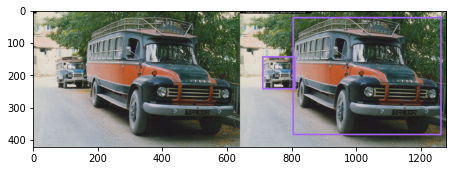

In [39]:
my_frame.get_view().render()

### Playing with dimensions

Frames and all augmented tensors rely on `names` to keep track of the dimension within the tensor.


In the following example we show the names, shape and types of the associated boxes labels.

In [64]:
print("frame.names:", frame.names) 
print("frame.shape:", frame.shape) 

print("type(boxes2d):", type(frame.boxes2d))
print("boxes2d.shape:", frame.boxes2d.names)
print("boxes2d.shape:", frame.boxes2d.shape)

frame.names: ('C', 'H', 'W')
frame.shape: torch.Size([3, 422, 640])
type(boxes2d): <class 'aloscene.bounding_boxes_2d.BoundingBoxes2D'>
boxes2d.shape: ('N', None)
boxes2d.shape: torch.Size([2, 4])


**Adding one batch dimension to the frame, will therefore change the whole structure**. The attached boxes will be converted into a list so that each frame of the batch can get associated with its own set of Boxes2D.

In [66]:
frames = frame.batch()

print("frame.names:", frames.names) 
print("frame.shape:", frames.shape) 

print("type(boxes2d):", type(frames.boxes2d))
print("len(boxes2d)", len(frames.boxes2d))

frame.names: ('B', 'C', 'H', 'W')
frame.shape: torch.Size([1, 3, 422, 640])
type(boxes2d): <class 'list'>
len(boxes2d) 1


<div class="alert alert-warning">
    
**WARNING**

Note that `names` are experimental torch features. Thefore augmented Tensor are still experimental feature as well to use with caution.
</div>

## Playing with Frames

Beyond having nice properties, Frames (and augmented tensors in general) can also benefit from consistent transformation across all labels. Let's take the first example by cropping the Frame.

In the following example, the frame and all attached labels are automatically cropped accordingly.

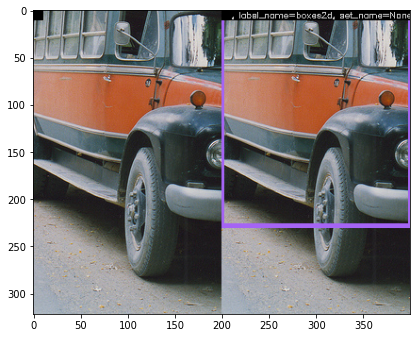

In [46]:
cropped_frame = frame[:,100:400,200:400]
cropped_frame.get_view().render()

Here is another example of flipping the frame horizontally.

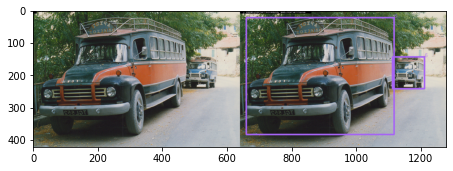

In [51]:
flipped_frame = frame.hflip()
flipped_frame.get_view().render()

Using what we've learned so far, we can know combine everything to create a new batch of frames with some augmentation.

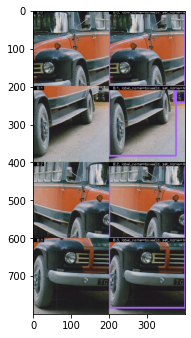

In [77]:
import torch

# Apply some augmentation
frame_1 = frame.hflip()[:,100:300,200:400]
frame_2 = frame.hflip()[:,200:400,300:500]
frame_3 = frame[:,100:300,200:400]
frame_4 = frame[:,200:400,300:500]

# Batch all frames and concat everything
frames = torch.cat([
    frame_1.batch(),
    frame_2.batch(),
    frame_3.batch(),
    frame_4.batch()
], dim=0)

frames.get_view().render()
